<a href="https://colab.research.google.com/github/BaseKan/aiday_training_resources/blob/main/TF_ConvNets/ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductie



In [1]:
import os
import numpy as np
import pandas as pd
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_cat_train = to_categorical(y_train, 10)

In [6]:
y_cat_test = to_categorical(y_test, 10)

In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
def create_model():
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [56]:
cnn_model = create_model()

In [46]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [12]:
cnn_model.fit(x=x_train, y=y_cat_train, epochs=5, validation_data=(x_test, y_cat_test), callbacks=[early_stop], batch_size=128)

Epoch 1/5
469/469 [==============================] - 105s 222ms/step - loss: 0.4928 - accuracy: 0.8223 - val_loss: 0.3738 - val_accuracy: 0.8647
Epoch 2/5
469/469 [==============================] - 104s 221ms/step - loss: 0.3105 - accuracy: 0.8885 - val_loss: 0.3049 - val_accuracy: 0.8910
Epoch 3/5
469/469 [==============================] - 104s 221ms/step - loss: 0.2628 - accuracy: 0.9055 - val_loss: 0.2693 - val_accuracy: 0.9023
Epoch 4/5
469/469 [==============================] - 104s 221ms/step - loss: 0.2331 - accuracy: 0.9148 - val_loss: 0.2561 - val_accuracy: 0.9055
Epoch 5/5
469/469 [==============================] - 103s 221ms/step - loss: 0.2064 - accuracy: 0.9245 - val_loss: 0.2510 - val_accuracy: 0.9098


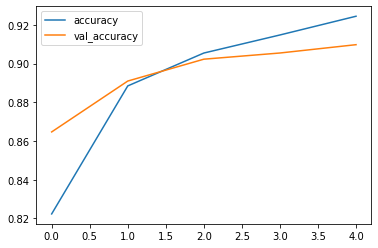

In [13]:
loss_df = pd.DataFrame(cnn_model.history.history)

loss_df[['accuracy', 'val_accuracy']].plot()

# Dataset

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

classes = [d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(train_dir, d))]

We splitsen de validatieset in een validatieset en een testset.


In [ ]:
for cl in classes:
  img_path = os.path.join(val_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  val, test = images[:round(len(images)*0.5)], images[round(len(images)*0.5):]

  for t in test:
    if not os.path.exists(os.path.join(base_dir, 'test', cl)):
      os.makedirs(os.path.join(base_dir, 'test', cl))
    shutil.move(t, os.path.join(base_dir, 'test', cl))

In [ ]:
print("{}: {} train images".format(classes[0], len(os.listdir(os.path.join(train_dir, classes[0])))))
print("{}: {} train images".format(classes[1], len(os.listdir(os.path.join(train_dir, classes[1])))))
print("{}: {} validation images".format(classes[0], len(os.listdir(os.path.join(val_dir, classes[0])))))
print("{}: {} validation images".format(classes[1], len(os.listdir(os.path.join(val_dir, classes[1])))))
print("{}: {} test images".format(classes[0], len(os.listdir(os.path.join(test_dir, classes[0])))))
print("{}: {} test images".format(classes[1], len(os.listdir(os.path.join(test_dir, classes[1])))))

We maken een image data generator om de afbeeldingen goed in te kunnen laden. Voor nu normaliseren we enkel de kleuren.

In [ ]:
batch_size = 32
IMG_SHAPE = 150

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
images = [train_data_gen[0][0][i] for i in range(5)]
plotImages(images)

# Image Augmentation

Horizontal Flip.

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random Rotation.

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random zoom.

In [ ]:
image_gen = ImageDataGenerator(rescale = 1/255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               shuffle = True,
                                               batch_size = batch_size)

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Transfer learning



In [14]:
import tensorflow_datasets as tfds

In [15]:
dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [16]:
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

In [18]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load('tf_flowers', split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'], as_supervised=True)

In [20]:
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224,224])
  final_image = tf.keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [21]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [25]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
  layer.trainable=False

83689472/83683744 [==============================] - 1s 0us/step


In [28]:
optimizer = tf.keras.optimizers.Adam()

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 566s 7s/step - loss: 0.6948 - accuracy: 0.7587 - val_loss: 0.5036 - val_accuracy: 0.8240
Epoch 2/5
86/86 [==============================] - 561s 7s/step - loss: 0.3866 - accuracy: 0.8710 - val_loss: 0.4365 - val_accuracy: 0.8512
Epoch 3/5
86/86 [==============================] - 563s 7s/step - loss: 0.3106 - accuracy: 0.9030 - val_loss: 0.3965 - val_accuracy: 0.8693
Epoch 4/5
86/86 [==============================] - 560s 7s/step - loss: 0.2664 - accuracy: 0.9161 - val_loss: 0.3792 - val_accuracy: 0.8748
Epoch 5/5
86/86 [==============================] - 563s 7s/step - loss: 0.2357 - accuracy: 0.9317 - val_loss: 0.3706 - val_accuracy: 0.8802


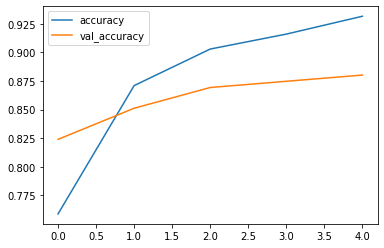

In [32]:
loss_df = pd.DataFrame(model.history.history)

loss_df[['accuracy', 'val_accuracy']].plot()

# Exercise

Gebruik de documentatie van [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) om meerdere augmentaties te combineren. Train vervolgens een CNN en probeer een zo goed mogelijke score te halen op de test set.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1/255)

val_data_gen = image_gen_val.flow_from_directory(directory = val_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 batch_size = batch_size)

image_gen_test = ImageDataGenerator(rescale=1/255)

test_data_gen = image_gen_test.flow_from_directory(directory = val_dir,
                                                   target_size = (IMG_SHAPE, IMG_SHAPE),
                                                   batch_size = batch_size)

In [ ]:
# Jouw code hier